# Sequence 00007 Data Visualisation

In [1]:
# IMPORT REQUIRED PACKAGES

from __future__ import print_function

# For number crunching
import numpy as np
import pandas as pd

# For visualisation
import matplotlib.pyplot as pl 
import seaborn as sns 

# For prediction 
import sklearn

# Misc
from itertools import cycle
import json 
import os

# Magic and formatting
% matplotlib inline

sns.set_context('poster')
sns.set_style('darkgrid')

current_palette = cycle(sns.color_palette())


Before doing any data science, it will be helpful to do visualisation on the data. To do this, we will use a set of classes written by Niall Twomey for easy access to the data. These are stored in a Python file called visualise_data.py and are quite interpretable.
We will visualise the training sequence identified by 00007. This is an arbitrary selection, and the cells below will work on all records (though if visualising the test instances the ground truth won't be shown, of course).

We use a helper class called SequenceVisualisation that can be located in the visualise_data.py file. This class will load in all of the available data, let you slice training data by activity, will plot some of the sensor data and annotations (when they are available), amongst other super useful things! We use three main sensor types in this challenge: PIR sensors, accelerometers, and video. 


# Analysing the length of a sequence

In [2]:
from visualise_data import SequenceVisualisation

plotter = SequenceVisualisation('public_data', 'public_data/train/00007')
sequence_window = (plotter.meta['start'], plotter.meta['end'])

# We can extract the time range of the activity 'jump' with the 'times_of_activity' function. 
# This function returns all of the times that jump was annotated, and it is indexed first 
# by the annotator, and then by the time at which it occurred. 
times_of_jump = plotter.times_of_activity('a_jump')

# Get the times at which these activities occured 
for ai, annotator_jumps in enumerate(times_of_jump): 
    print ('Annotator {}'.format(ai))
    
    # The annotator_jumps is a list of tuples. The length of this list specifies the number of segments as
    # annotated as 'a_jump' by this annotator. Each element of this list is a tuple that holds the start and 
    # end time of the t-th annotation in that order, ie: 
    for ti, (start, end) in enumerate(annotator_jumps, start=1): 
        print ('  Annotation {}'.format(ti))
        print ('    Start time: {}'.format(start))
        print ('    End time:   {}'.format(end))
        print ('    Duration:   {}'.format(end - start))
        print ()

# The sequence object also holds metadata regarding the length of the sequence. 
sequence_window = (plotter.meta['start'], plotter.meta['end'])
print (sequence_window)

Annotator 0
  Annotation 1
    Start time: 36.83
    End time:   38.87
    Duration:   2.04

  Annotation 2
    Start time: 1489.443
    End time:   1490.866
    Duration:   1.423

Annotator 1
  Annotation 1
    Start time: 37.145
    End time:   38.935
    Duration:   1.79

  Annotation 2
    Start time: 1489.165
    End time:   1490.615
    Duration:   1.45

(0, 1523.017)


# Plotting location


The black lines in the image below are the times during which the PIR sensors were activated. The red, green, and blue lines here are then the annotations provided by the three annotators.
Note PIR sensors can elicit false negative and false positive activations - ie they do not always trigger when someone is present, and they can trigger when someone is not present due to the infrared radiation from the sun in warm weather. Knowing the location will help in analysis, eg someone on the staircase is more likely to be ascending/descending the stairs rather than walking flat, and they would be very unlikely to be sitting. Location information is provided in the training data sets only.


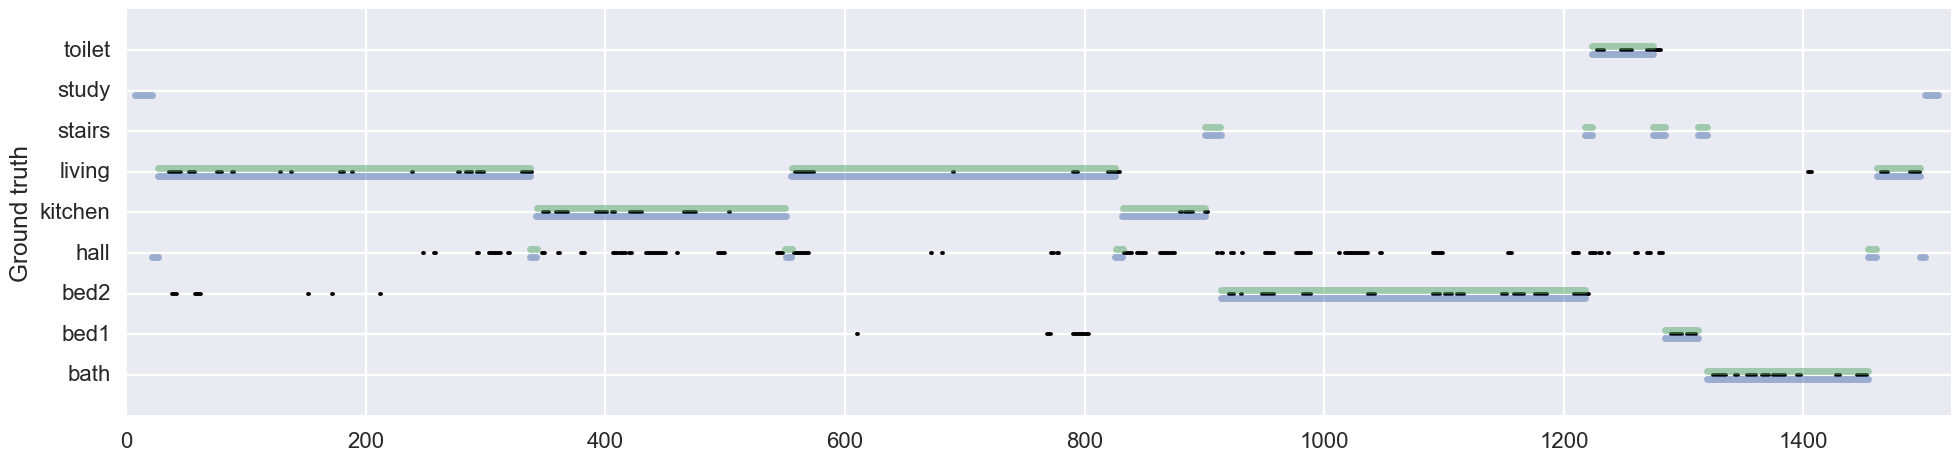

In [3]:
plotter.plot_pir(sequence_window, sharey=True)

# Plotting Received Signal Strength Indicator (RSSI)


This function plots the received signal strength indicator (RSSI) of the wireless transmission. RSSI is a measure of how strongly the accelerometer's signal was received. As a simple rule, the closer you are to the receiver (which we call an access point), the more power there is in the received signal (but this rule doesn't necessarily apply if your body gets in the way of the accelerometer and the access point!).
There are four access points located in the SPHERE house, and these are located in:
    1. the kitchen;
    2. the lounge;
    3. upstairs; and
    4. in the study.
RSSI is a useful indication of location (together with PIR data). In the image below, the RSSI data is plotted together with the locations. There is a very strong correspondance, for example, between the lounge trace (green) and the annotation of presence in the lounge. And in locations without an access point (eg bed2) you can see patterns in the RSSI signal that should be indicative of your location.


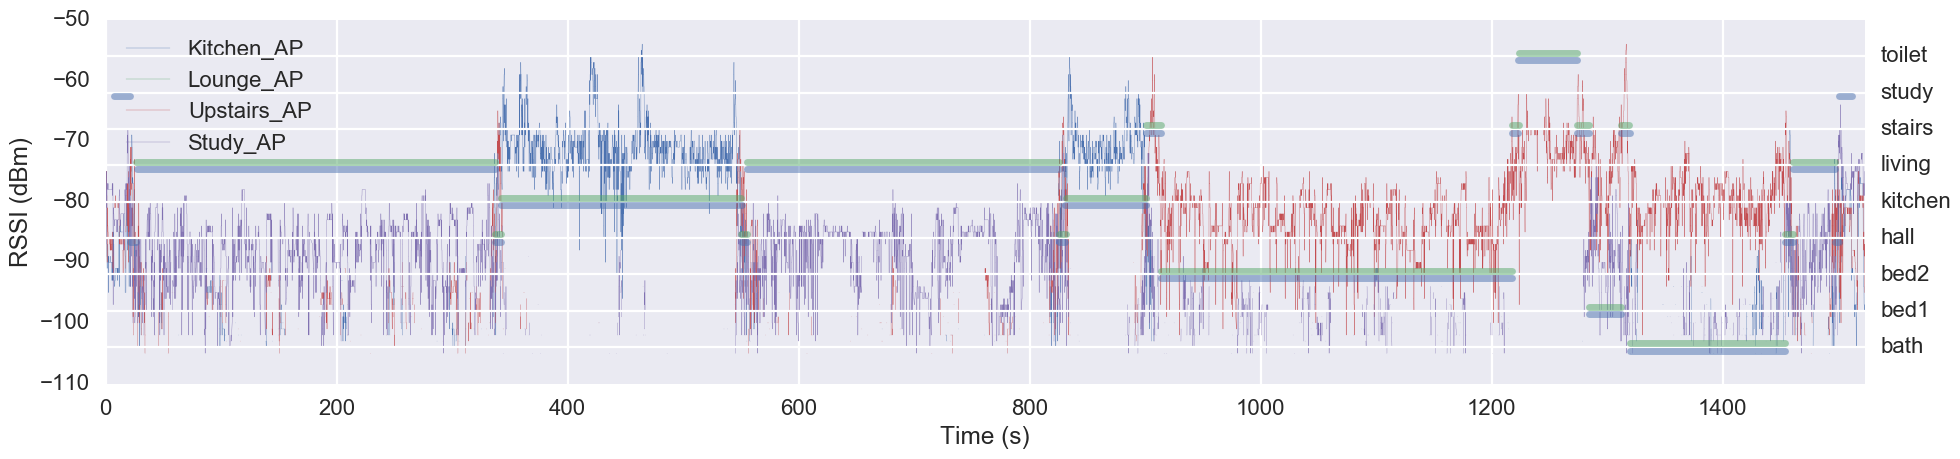

In [4]:
plotter.plot_rssi(sequence_window)

# Plotting acceleration


This plots the acceleration data (in the continuous line traces) and annotated activities.
Here we can see another interesting aspect of the data, namely that while the annotators agree quite a lot of the time, often there is disagreement regarding the annotated activities. There are various different types of disagreement, and one of the most interesting is the disagreement of the specific start and end times of the activities.


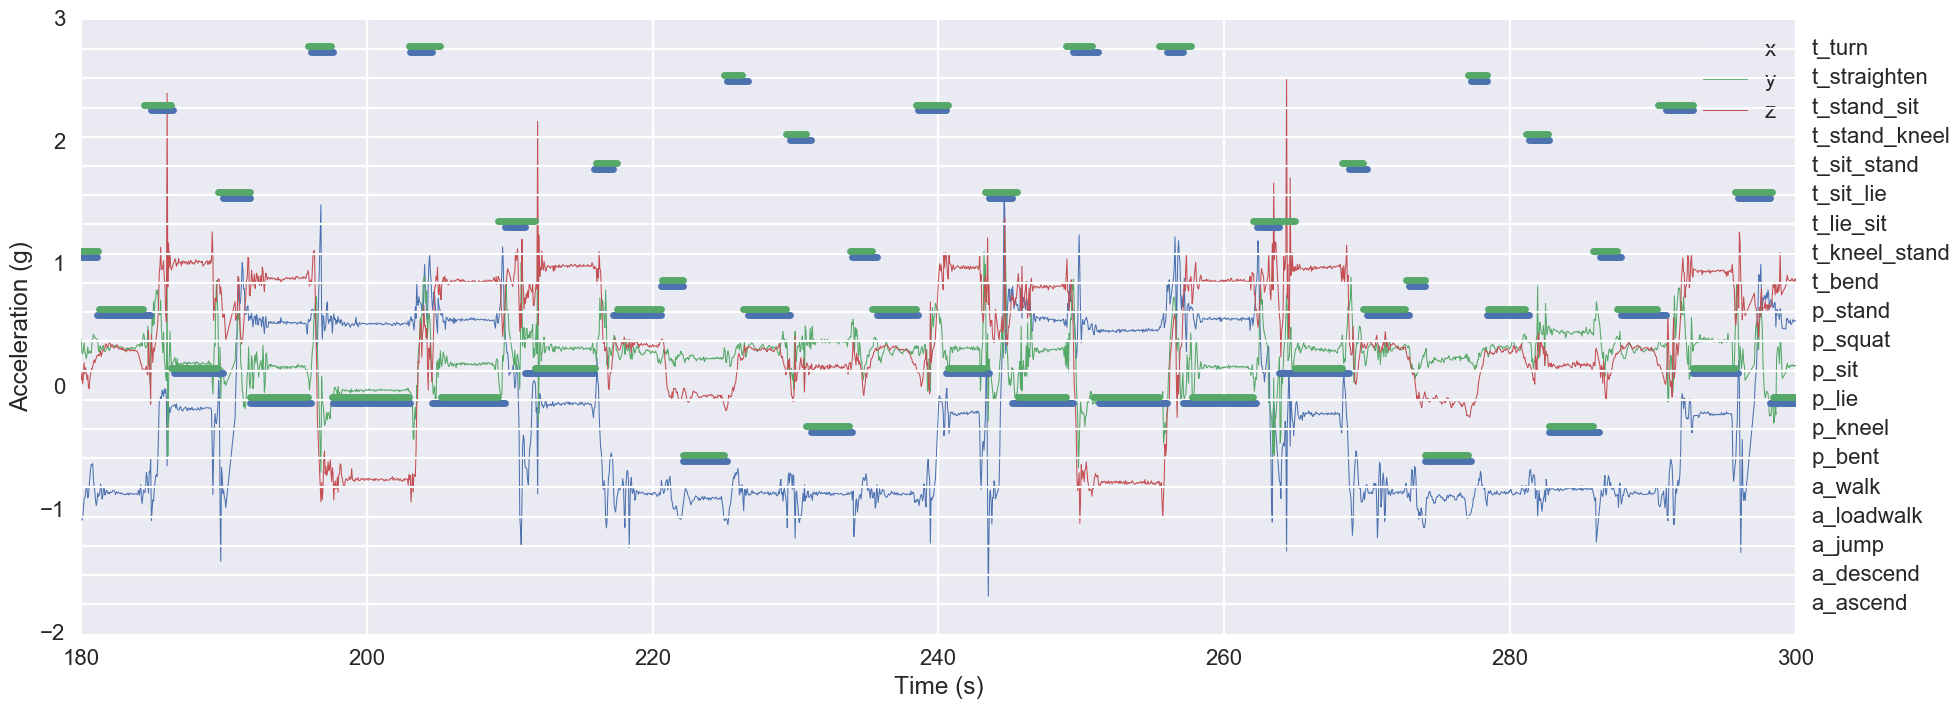

In [5]:
plotter.plot_acceleration((sequence_window[0] + 180, sequence_window[0] + 300))

# Plotting video data


The visualisation below shows the video data that we give with this challenge. We do not give the raw video data (in order to procet the anonymity of the participants), so we give coordinate of 2D and 3D bounding boxes, and the centre of these boxes. These are quite coarse as features go, but there is certainly valuable information in the features that you might extract from these bounding boxes (including volumn, height, aspect ratios, etc). To understand what all of the columns are, see §2.2 from the following paper:
Niall Twomey, Tom Diethe, Meelis Kull, Hao Song, Massimo Camplani, Sion Hannuna, Xenofon Fafoutis, Ni Zhu, Pete Woznowski, Peter Flach, Ian Craddock: “The SPHERE Challenge: Activity Recognition with Multimodal Sensor Data”, 2016;arXiv:1603.00797.
In the images below, we plot the the centre of the 2D and 3D bounding boxes. The cameras are located in the hallway, living_room and the kitchen respectively. The red, blue and green horozontal lines in the images correspond to the ground truth location annotations that are provided, and these correspond to the right hand axis labels. eg, at 500 seconds, the annotations state that the participant was in the kitchen. The other lines indicate the values of the features as the participant moves throughout the room.


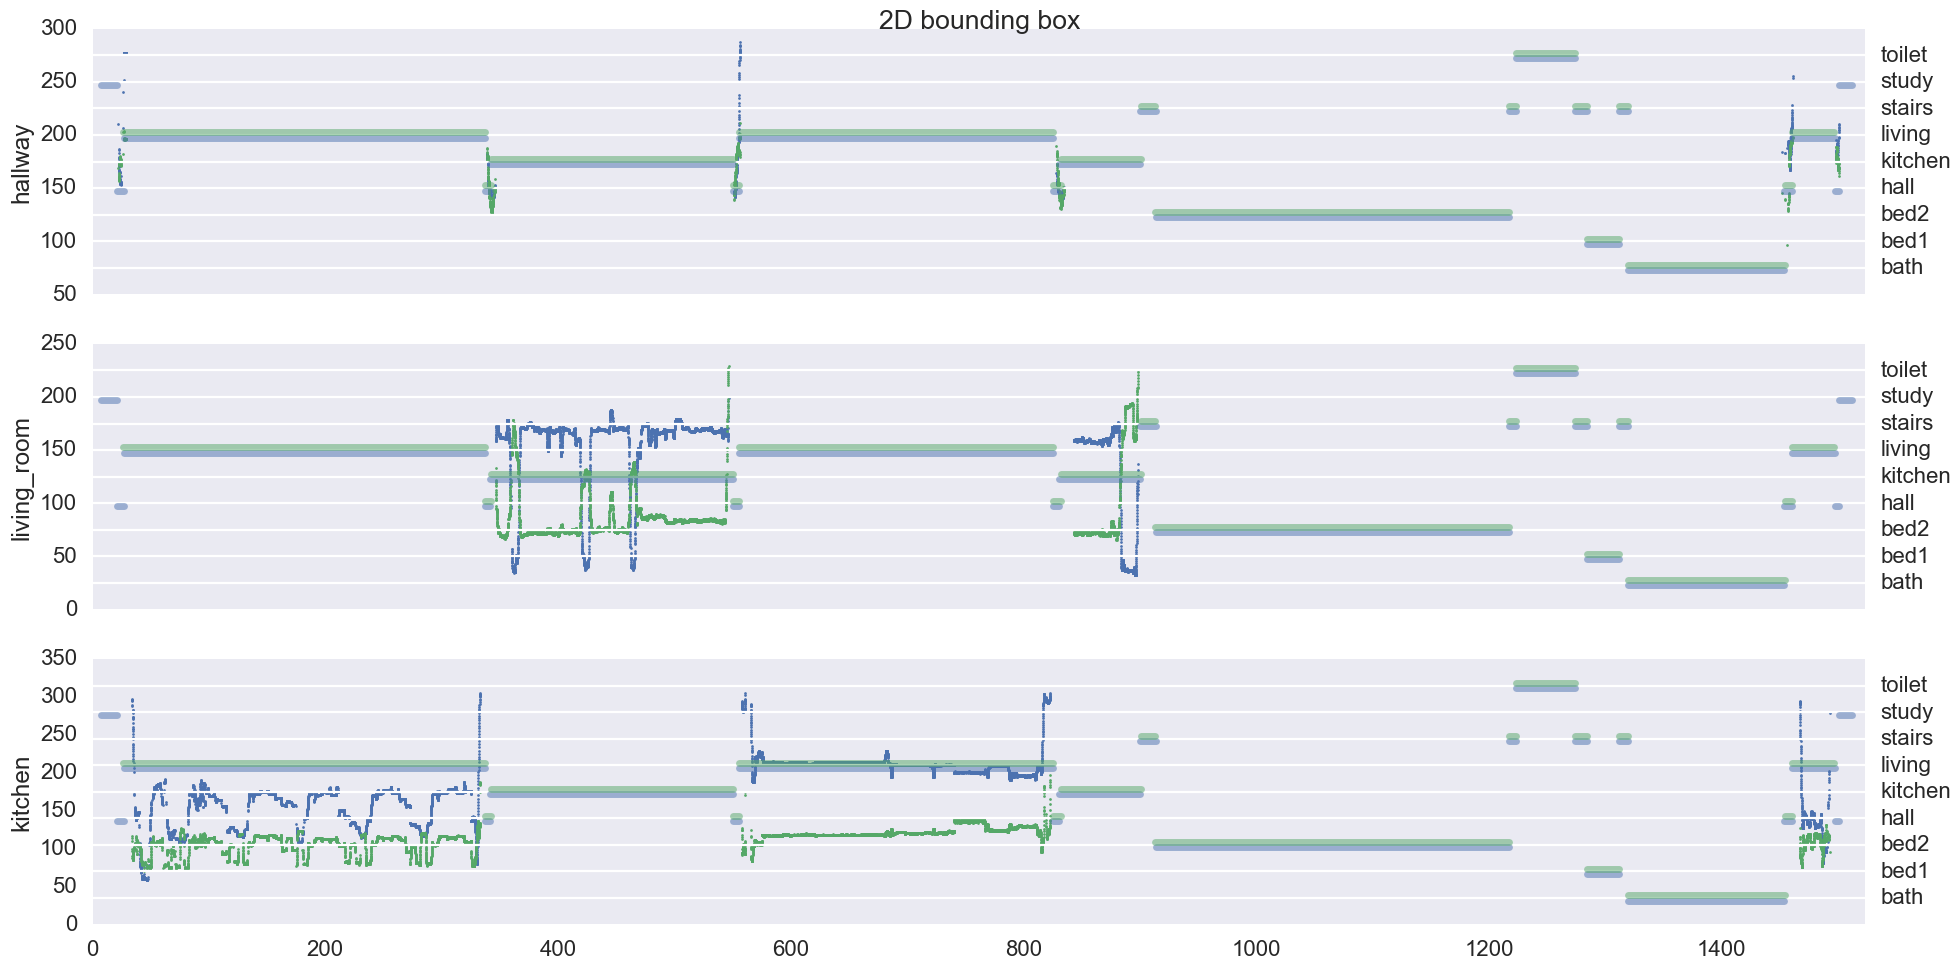

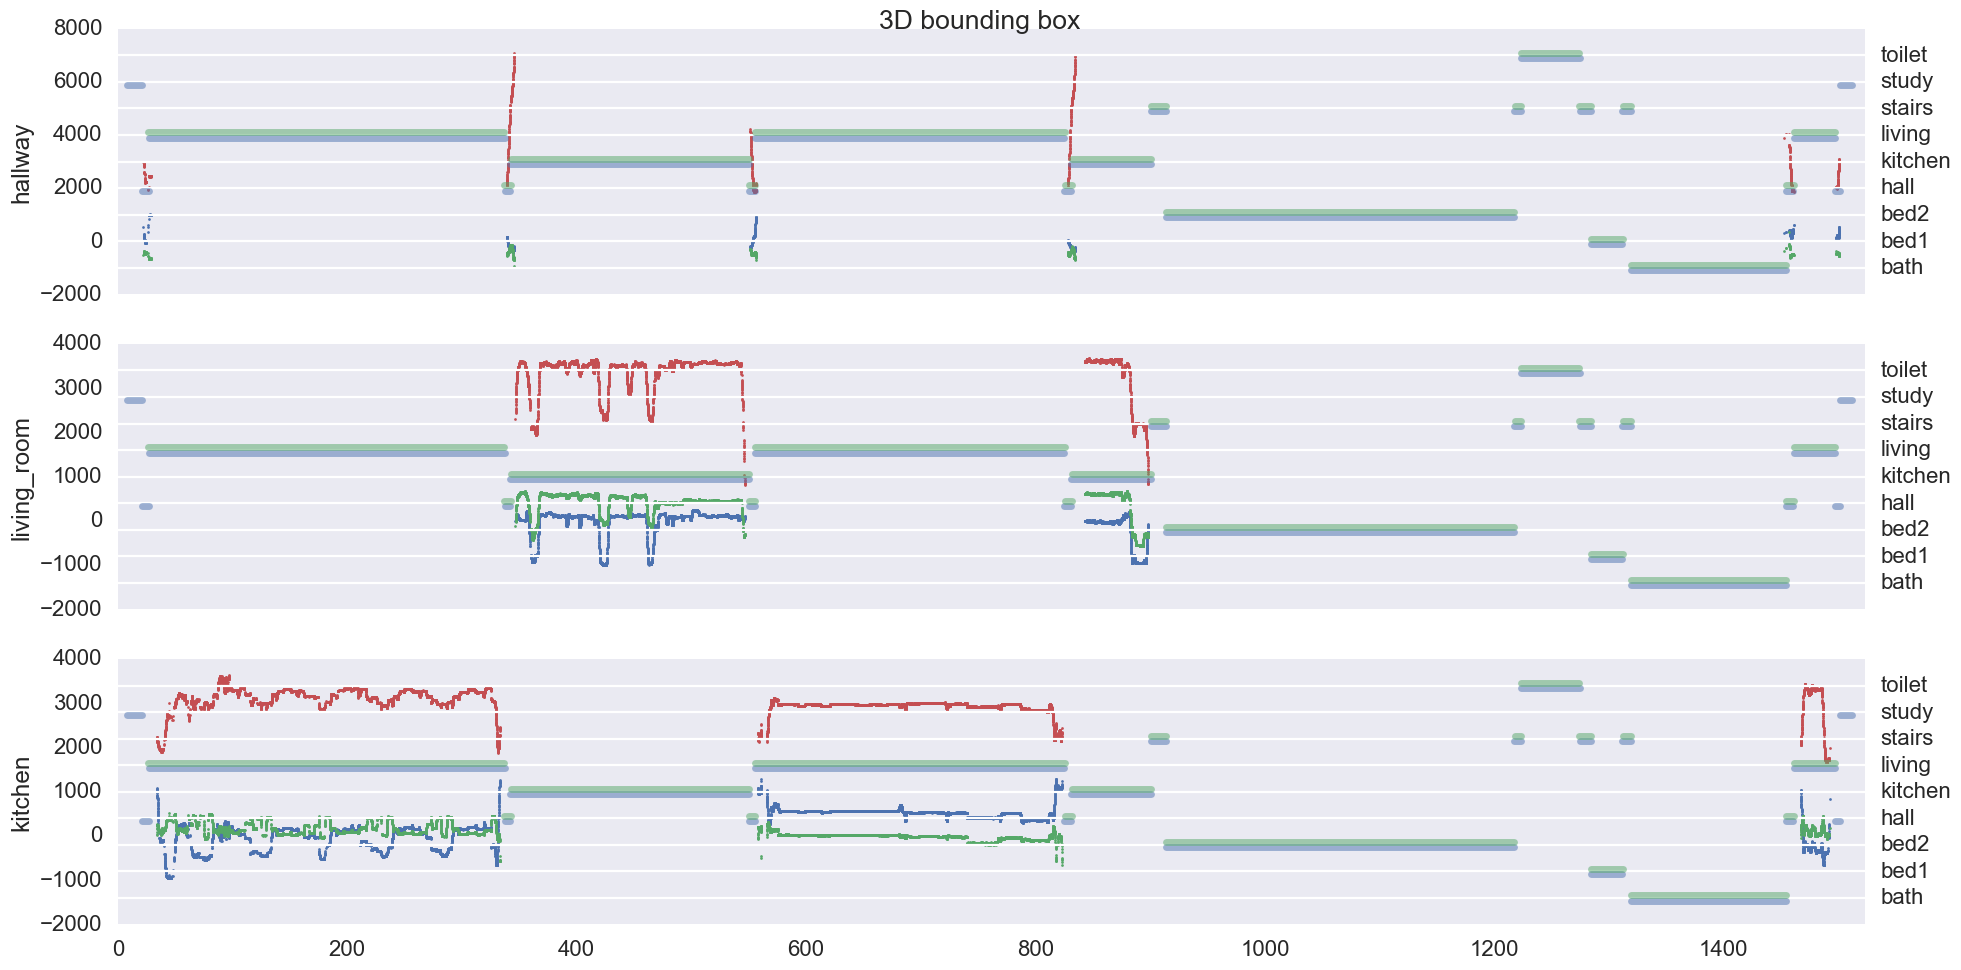

In [6]:
plotter.plot_video(plotter.centre_2d, sequence_window)
pl.gcf().suptitle('2D bounding box')

plotter.plot_video(plotter.centre_3d, sequence_window)
pl.gcf().suptitle('3D bounding box')

# Visualising the classification targets


We now take a look at the ground truth targets that accompany the training sequences. The labels that are annotated (20 in total) are described in the README. In the image below, we plot the first two minutes of the target data. In the image, the x-axis is over time, and the y-axis is over probabilities. Each subplot represents a particular activity, and we only plot the activities which have been annotated over this time window so as to save vertical space.
One of the most important things to take away from this image is that the targets are not 0/1, but they are probabilities, and the probilities represent the average label assigned by the annotators.


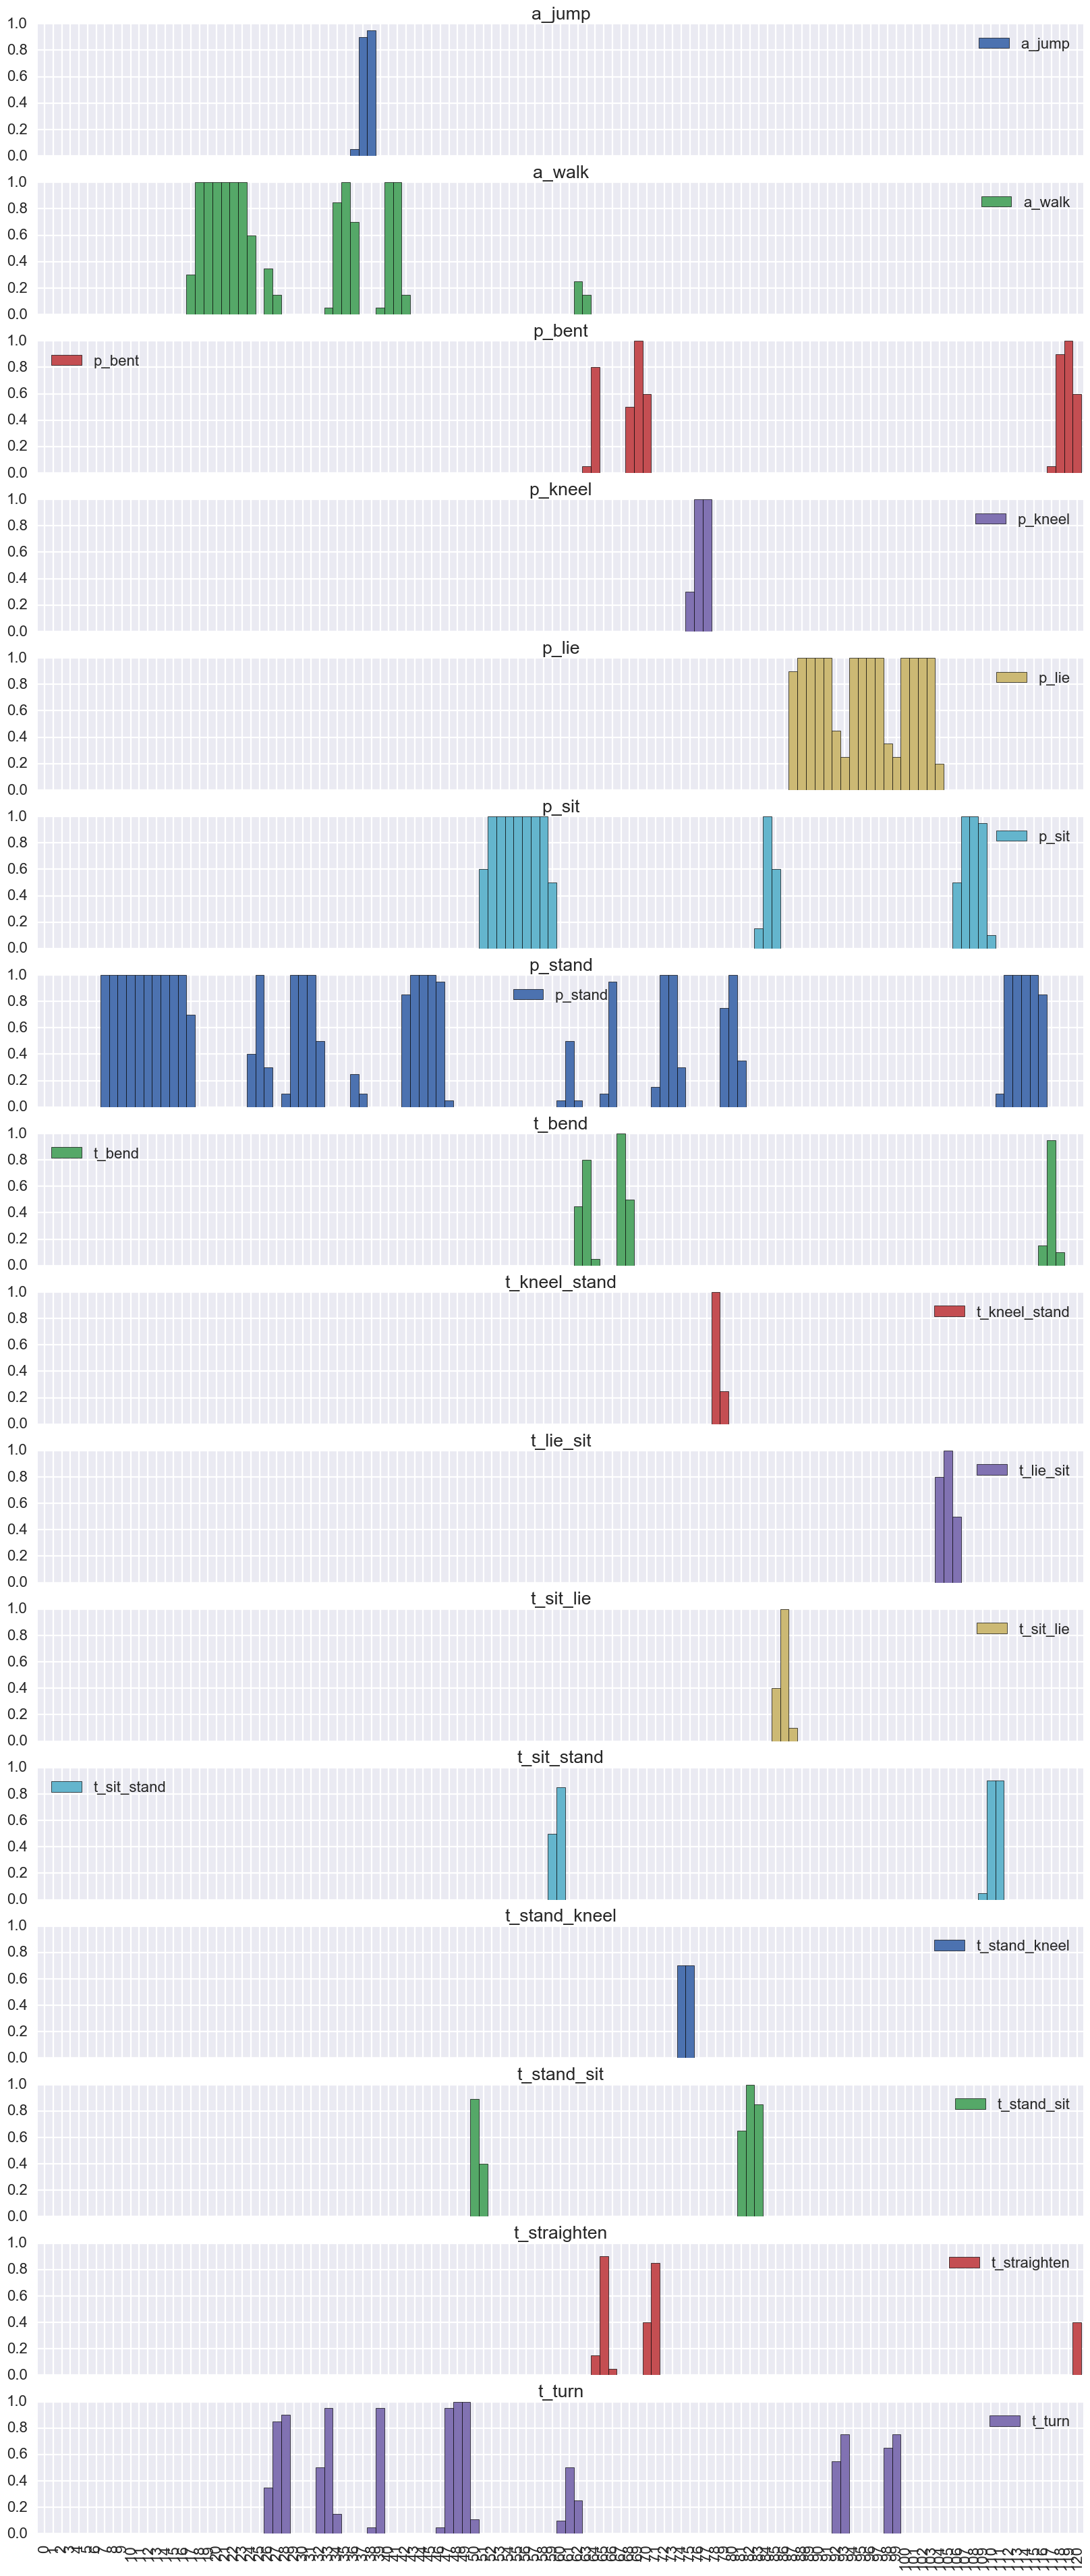

In [7]:
annotation_names = plotter.targets.columns.difference(['start', 'end'])

# Select only the first minute of data and multiply by required num of minutes
sub_df = plotter.targets.ix[:60 * 2]

# Select only the columns that are non-empty 
sub_df_cols = [col for col in annotation_names if sub_df[col].sum() > 0]

# Plot a bar-plot based on probability
current_palette = cycle(sns.color_palette())
sub_df[sub_df_cols].plot(
    kind='bar', 
    subplots=True, 
    sharex=True, 
    sharey=True, 
    figsize=(20, 3 * len(sub_df_cols)), 
    width=1.0, 
    color=[next(current_palette) for _ in annotation_names]
);